In [1]:
import numpy as np
import matplotlib.pyplot as plt

<module 'matplotlib.pyplot' from '/home/igor/Projects/nsu-bda-2024-accidents/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

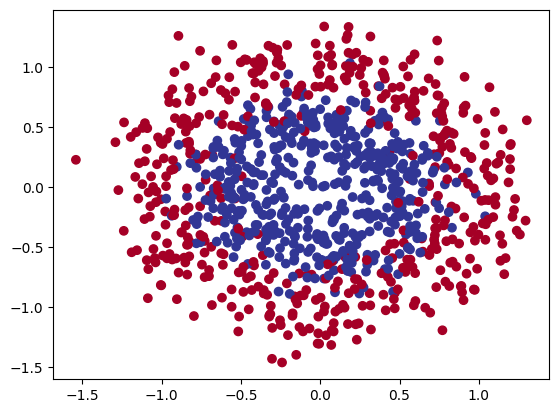

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt

In [3]:
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf')

fit_start = time.time()
svm_model.fit(X_train, y_train)
fit_end = time.time()

pred_start = time.time()
y_pred = svm_model.predict(X_test)
pred_end = time.time()

fit_end - fit_start, pred_end - pred_start

(0.0037500858306884766, 0.0011708736419677734)

In [4]:
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    return plt

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.cm as cm

def get_metrics(y_t, y_p):
    accuracy = accuracy_score(y_t, y_p)
    precision = precision_score(y_t, y_p)
    recall = recall_score(y_t, y_p)
    f1 = f1_score(y_t, y_p)

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    values = [accuracy, precision, recall, f1]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, values, color=cm.rainbow(np.linspace(0, 1, len(metrics))))

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

    plt.ylim(0, 1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    return plt

<module 'matplotlib.pyplot' from '/home/igor/Projects/nsu-bda-2024-accidents/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

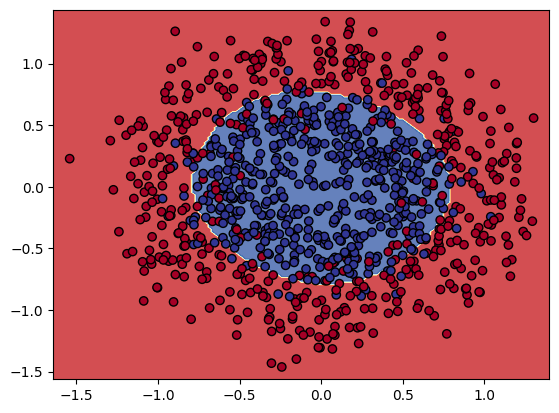

In [6]:
plot_decision_boundary(X, y, svm_model)

<module 'matplotlib.pyplot' from '/home/igor/Projects/nsu-bda-2024-accidents/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

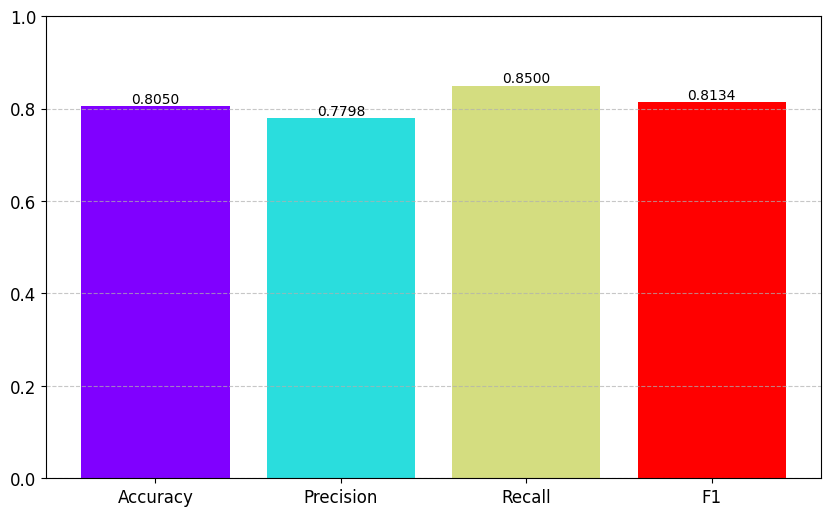

In [7]:
get_metrics(y_test, y_pred)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
fit_start = time.time()
rf_model.fit(X_train, y_train)
fit_end = time.time()

pred_start = time.time()
y_pred_rf = rf_model.predict(X_test)
pred_end = time.time()

fit_end - fit_start, pred_end - pred_start

(0.10196328163146973, 0.0048675537109375)

<module 'matplotlib.pyplot' from '/home/igor/Projects/nsu-bda-2024-accidents/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

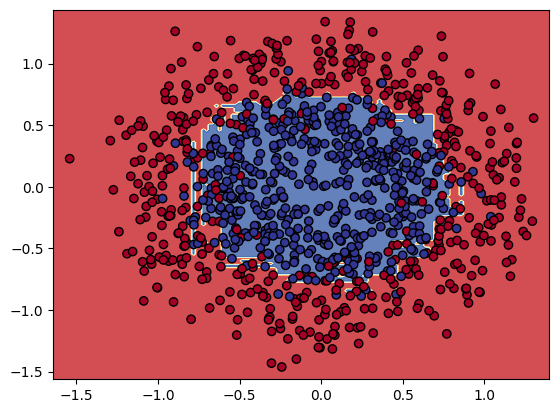

In [9]:
plot_decision_boundary(X, y, rf_model)

<module 'matplotlib.pyplot' from '/home/igor/Projects/nsu-bda-2024-accidents/env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

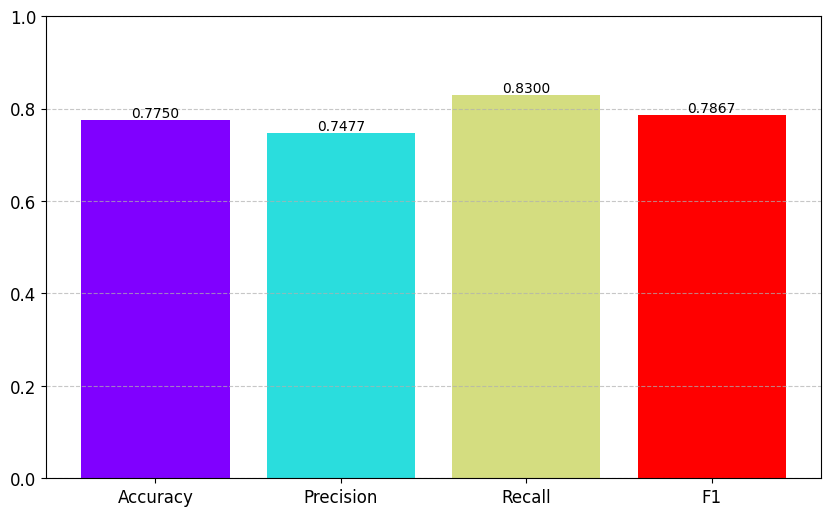

In [10]:
get_metrics(y_test, y_pred_rf)